### Identification of all the members of the group.
Name: Renan Tiago dos Santos Silva

Name: Gabriel Sarti Massukado

Name: Paulo Henrique Silva Araujo

Name: Rafael Sander Nogueira

Name: João Gabriel Lembo

## Name of the dataset
Dataset: Heart Disease

## Abstract
This dataset contains information about several people that experienced different types of chest pain, with the data mainly relating to factors that contribute towards having heart diseases, such as cholesterol, blood sugar and eletrocardiographic results.

To our analysis, only a subset of the dataset was considered, that being the Cleveland database, which was already pre-processed.

## Questions to the dataset
Is there a relation between the age of the patients and the development of heart diseases? (1)

Is one of the sexes more likely to have heart diseases? (2)

What is the relation between the electrocardiogram result and the occurrence of heart attacks? (3)

Do physical exercises have any impact in the chance of developing heart diseases? (4)

Which data is more effective in detecting the possibility of heart diseases? (5)

The questions will be expanded upon during the analysis and will be referenced by their number.

Note: the other questions made in the previous exercise were removed since they relied on some data that is not available in this version of the dataset.


## EDA
Present your EDA strategy:
Our strategy consists in observing basic information about the dataset first, such as the mean, variance, min and max values, etc, of our data. Then, we want to check some information about the age and sex of the patients, and then search for correlation between some of the data and the 'num' value, which is the chance of developing heart diseases. All these steps are more documented together with the upcoming analysis.

## Analysis/Visualizations:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#imports the dataset and prints it raw
hearts = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num'])
hearts.info()
print(hearts)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB
      age  sex   cp  trestbps   chol  fbs  ...  exang  oldpeak  slope   ca  thal num
0    63.0  1.0  1.0     145.0  233.0  1.0  ...    0.0      2.3    3.0  0.0   6.0   0
1    67.0  1.0  4.0     160.0  286.0 

In [2]:
#relevant measurements
hearts_num = hearts.drop(columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'num'])
hearts_num.describe()

age    trestbps        chol     thalach     oldpeak
count  303.000000  303.000000  303.000000  303.000000  303.000000
mean    54.438944  131.689769  246.693069  149.607261    1.039604
std      9.038662   17.599748   51.776918   22.875003    1.161075
min     29.000000   94.000000  126.000000   71.000000    0.000000
25%     48.000000  120.000000  211.000000  133.500000    0.000000
50%     56.000000  130.000000  241.000000  153.000000    0.800000
75%     61.000000  140.000000  275.000000  166.000000    1.600000
max     77.000000  200.000000  564.000000  202.000000    6.200000

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


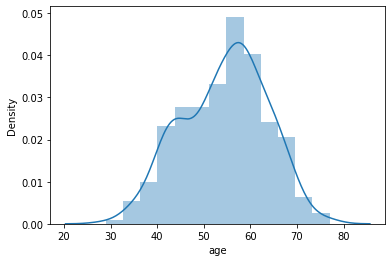

In [3]:
sns.distplot(hearts['age'])

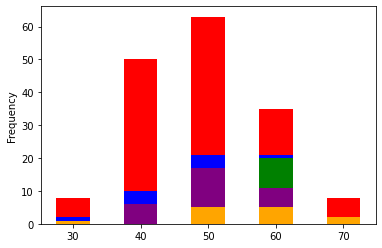

In [4]:
hearts_by_age = hearts.copy()
for index, row in hearts_by_age.iterrows():
  hearts_by_age.at[index, 'age'] = (row['age'] - 9) - (row['age']-9)%10 + 10 #converts people from ages x9 - (x+1)8 to age (x+1)0. Ex: 29-38 becomes 30.

colors = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(5):
  hearts_by_age[hearts_by_age['num'] == i].groupby('age')['age'].plot.hist(range = (25, 75), rwidth = 0.5, bins = 5, color=colors[i])

First, we plot the age of the patients to get a little more knowledge of the dataset and then we check if there is any age interval where the chances of developing heart diseases are higher. By looking at the histogram (where red bars represent healthy patients, and the other colors represent different probabilities of developing the diseases), we can see that people between ages 59 and 68 are more likely to have this diseases, with over 50% of the patients having possibilities of the development while the other intervals have a rate of healthy patients of more than 50%. (1)


Then, we want to check if the sex of the patients can tell us something about the development of heart diseases.

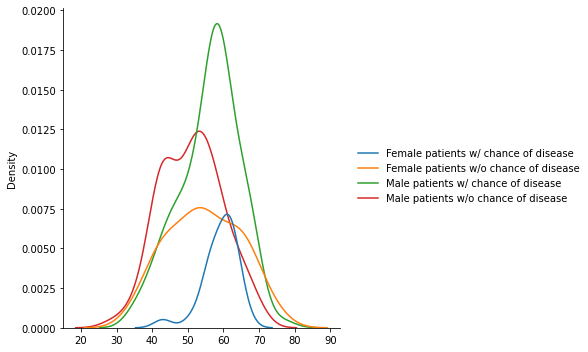

In [5]:
MD = hearts.query('sex == 0 & num > 0')

MN = hearts.query('sex == 0 & num == 0')

HD = hearts.query('sex == 1 & num > 0')

HN = hearts.query('sex == 1 & num == 0')

result1 = pd.concat([MD['age'], MN['age'],HD['age'], HN['age']], axis=1, sort=False)

result1.columns = ['Female patients w/ chance of disease', 'Female patients w/o chance of disease', 'Male patients w/ chance of disease', 'Male patients w/o chance of disease']

sns.displot(result1, kind="kde")

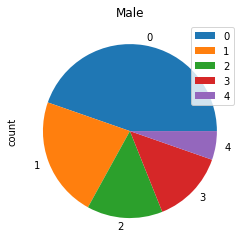

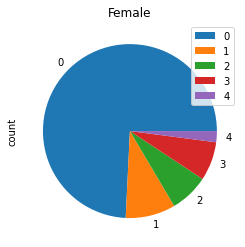

In [6]:
m = hearts[hearts['sex'] == 1].groupby('num').count()
m['count'] = m['age']
m.plot.pie(y = 'count', title="Male")
f = hearts[hearts['sex'] == 0].groupby('num').count()
f['count'] = f['age']
f.plot.pie(y = 'count', title="Female")

By looking at the pie charts, we can see that male patients have a higher chance of developing heart diseases (2). Now, we can look at the correlation matrix to see what other aspects influence heart diseases, so we can check if any of them are also related to the sex of the patients.



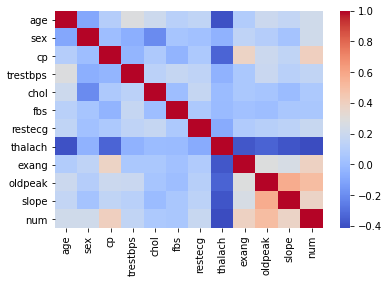

In [7]:
sns.heatmap(hearts.corr(), cmap = "coolwarm")

Looking at the correlation matrix, we can see that there are 4 values (cp, exang, slope and oldpeak) that have some correlation to the 'num' value, which is the probability of developing heart diseases (5). We found it curious that cholesterol, which is tipically associated with heart problems, has no correlation with the presence of heart diseases.

We can see that both the slope and oldpeak values are related to readings of the patients' electrocardiogram results. Since the oldpeak is the analysis of the depressions present in the electrocardiogram, and the slope is related to a inclination of the values read in the exam (with a downward inclination being related to the development of heart diseases), we can check that there is a relation between the results of the electrocardiogram and the development of heart diseases (3).

Besides that, although we can't check (using the data available) if exercises have an influence in the development of the diseases, we can see that they are helpful in detecting this possibility, since the exang, slope and oldpeak values are all measured after exercises and have a good relation with the 'num' value. So, we don't know if they have influence but we know that we can use them to check for values that we know are correlated with the presence of heart diseases (4).

Now let's compare these 4 values between male and female patients to see if there are any differences.


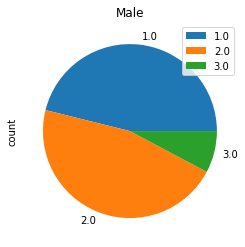

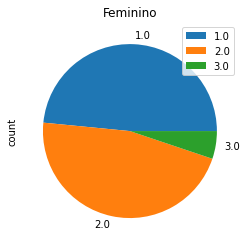

In [8]:
m = hearts[hearts['sex'] == 1].groupby('slope').count()
m['count'] = m['age']
m.plot.pie(y = 'count', title="Male")


f = hearts[hearts['sex'] == 0].groupby('slope').count()
f['count'] = f['age']
f.plot.pie(y = 'count', title="Feminino")

With the pie charts above, we can observe that there are not many differences between sexes. So, we can see that they have some influence in the development of heart diseases, but have no connection with the sex of the patients.

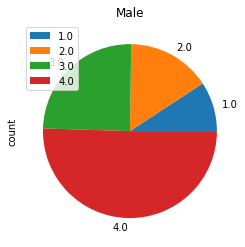

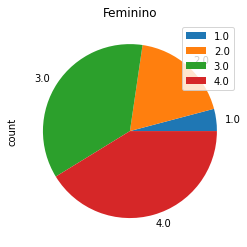

In [9]:
m = hearts[hearts['sex'] == 1].groupby('cp').count()
m['count'] = m['age']
m.plot.pie(y = 'count', title="Male")


f = hearts[hearts['sex'] == 0].groupby('cp').count()
f['count'] = f['age']
f.plot.pie(y = 'count', title="Feminino")

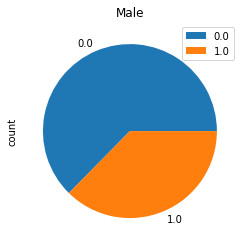

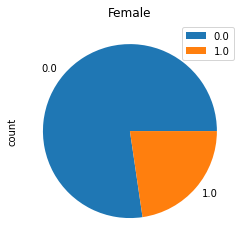

In [10]:
m = hearts[hearts['sex'] == 1].groupby('exang').count()
m['count'] = m['age']
m.plot.pie(y = 'count', title="Male")


f = hearts[hearts['sex'] == 0].groupby('exang').count()
f['count'] = f['age']
f.plot.pie(y = 'count', title="Female")

Observing these two pie charts, we can see that both male and female patients have the same rate of angina-related chest pain, but male ones have less non-anginal pain. We believe that there is a chance that this is caused by male patients that don't inform their pain believing that it is not a problem, but we can't really assume that using the data we have available, so it stays as a supposition.
However, we can see that female patients have more atypical anginal pain, which means that they only have 2 of these 3 criteria: (1) Substernal chest pain or discomfort that is (2) provoked by exertion or emotional stress and (3) relieved by rest or nitroglycerine (or both); while male have all three. But since the data are grouped, we can not know which of these 3 is not present in females so we can't analyze it further.